In [1]:
from landlab.components.submarine_diffusion.create_initial_profile import create_initial_profile
from landlab.components.submarine_diffusion.utils2 import find_shoreline2
from landlab.components.submarine_diffusion import SubmarineDiffuser
from landlab.components.submarine_diffusion.sea_level import sea_level_file, sea_level_type
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
import numpy as np

In [3]:
user_inputed_yaml_file = input('Insert a yaml file name here')

Insert a yaml file name heredefault.yaml


In [4]:
from yaml_file_check import Yaml_File_Check
planform = Yaml_File_Check(user_inputed_yaml_file)

In [5]:
planform

{'alpha': 0.0005,
 'dt': 100.0,
 'dx': 100.0,
 'hgt': 15.0,
 'ksh': 100.0,
 'load': 0.3,
 'number_of_node_columns': 200,
 'output-filename': 'seq_test',
 'output_interval': 1000.0,
 'run_duration': 20000.0,
 'sea_level': 0.0,
 'sl_file_name': 'sample_sea_level_file.txt',
 'sl_sh': 0.001,
 'sl_type': 'sea_level',
 'start_time': -20000.0,
 'topo_file': 'bathymetry.txt',
 'wave_base': 60.0}

In [6]:
sea_level_type(planform)
#asks the user whether a sea level file or function is preferred

TypeError: 'function' object is not subscriptable

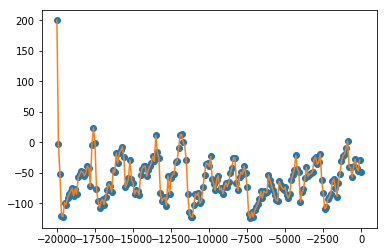

(array([-20000., -19900., -19800., -19700., -19600., -19500., -19400.,
        -19300., -19200., -19100., -19000., -18900., -18800., -18700.,
        -18600., -18500., -18400., -18300., -18200., -18100., -18000.,
        -17900., -17800., -17700., -17600., -17500., -17400., -17300.,
        -17200., -17100., -17000., -16900., -16800., -16700., -16600.,
        -16500., -16400., -16300., -16200., -16100., -16000., -15900.,
        -15800., -15700., -15600., -15500., -15400., -15300., -15200.,
        -15100., -15000., -14900., -14800., -14700., -14600., -14500.,
        -14400., -14300., -14200., -14100., -14000., -13900., -13800.,
        -13700., -13600., -13500., -13400., -13300., -13200., -13100.,
        -13000., -12900., -12800., -12700., -12600., -12500., -12400.,
        -12300., -12200., -12100., -12000., -11900., -11800., -11700.,
        -11600., -11500., -11400., -11300., -11200., -11100., -11000.,
        -10900., -10800., -10700., -10600., -10500., -10400., -10300.,
      

In [7]:
sea_level_file(planform['sl_file_name'], planform)

In [8]:
from netCDF4 import Dataset
dataset = Dataset('netcdf_file_example.nc')
#read in the netcdf file go straight into a grid

In [9]:
#still need to input subsidence and sea level arrays calculate sea level tpe outside in sequence

In [10]:
from landlab import RasterModelGrid, CLOSED_BOUNDARY
grid = RasterModelGrid((3,200), spacing = 500.)
grid.status_at_node[grid.nodes_at_top_edge]    = CLOSED_BOUNDARY
grid.status_at_node[grid.nodes_at_bottom_edge] = CLOSED_BOUNDARY

In [11]:
z = create_initial_profile(grid.x_of_node)
grid.add_field('topographic__elevation', z.copy(), at='node')

array([ 15.8       ,  15.4       ,  15.        ,  14.6       ,
        14.2       ,  13.8       ,  13.4       ,  13.        ,
        12.6       ,  12.2       ,  11.8       ,  11.4       ,
        11.        ,  10.6       ,  10.2       ,   9.8       ,
         9.4       ,   9.        ,   8.6       ,   8.2       ,
         7.8       ,   7.4       ,   7.        ,   6.6       ,
         6.2       ,   5.8       ,   5.4       ,   5.        ,
         4.6       ,   4.2       ,   3.8       ,   3.4       ,
         3.        ,   2.6       ,   2.2       ,   1.8       ,
         1.4       ,   1.        ,   0.6       ,   0.2       ,
        -2.01254646,  -5.44066082,  -8.22107857, -10.4970697 ,
       -12.38021299, -13.95740606, -15.29632487, -16.4496755 ,
       -17.45850548, -18.35478266, -19.16340364, -19.90375791,
       -20.590946  , -21.23672823, -21.85026354, -22.43868493,
       -23.00754758, -23.56117787, -24.10294517, -24.63547359,
       -25.16080674, -25.68053622, -26.19590155, -26.70

In [12]:
z0 =z

19656.024615233764
19656.024615233764


19656.024615233764

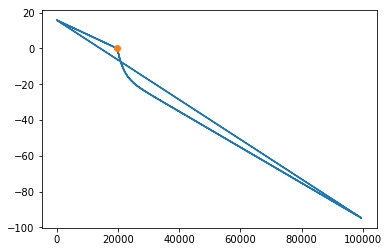

In [13]:
shore = find_shoreline2(grid.x_of_node[grid.core_nodes], z[grid.core_nodes], 0.)
plt.plot(grid.x_of_node,z,shore,0,'o' )
shore

19656.024615233764
19656.024615233764


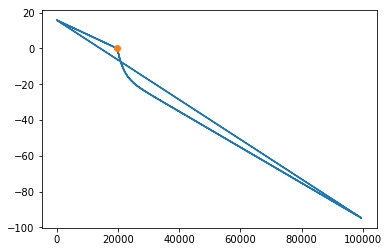

In [14]:
shore = find_shoreline2(grid.x_of_node[grid.core_nodes], z[grid.core_nodes], 0.)
plt.plot(grid.x_of_node,z,shore,0,'o' )

In [15]:
sd = SubmarineDiffuser(grid, shore)

In [16]:
k = sd.calc_diffusion_coef(shore)

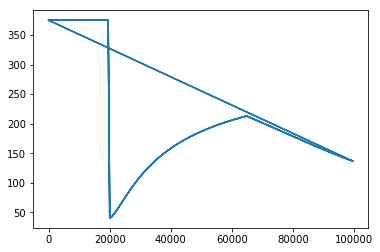

In [17]:
plt.plot(grid.x_of_node,k)

In [18]:
k = sd.grid.at_node['kd'].copy()
grid.x_of_cell[48]
sd.grid.at_node['topographic__elevation'][200] = sd.grid.at_node['topographic__elevation'][201]

In [19]:
for time_step in range(1000):
    sd.run_one_step(100)

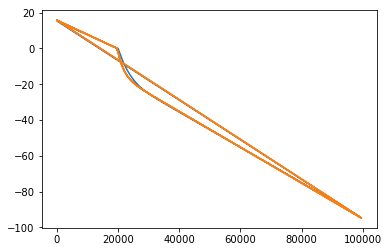

In [20]:
z1 = sd.grid.at_node['topographic__elevation']
plt.plot(grid.x_of_node,z1,grid.x_of_node,z)

In [22]:
shore = find_shoreline2(grid.x_of_node[grid.core_nodes], z1[grid.core_nodes], 0.)
shore

19699.31508557339
19699.31508557339


19699.31508557339

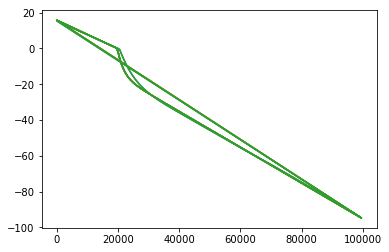

In [23]:
for time_step in range(1000):
    sd.run_one_step(100)
    z2 = sd.grid.at_node['topographic__elevation']
plt.plot(grid.x_of_node,z1,grid.x_of_node,z, grid.x_of_node,z2)

In [24]:
z2

array([  1.58000000e+01,   1.54000000e+01,   1.50000000e+01,
         1.46000000e+01,   1.42000000e+01,   1.38000000e+01,
         1.34000000e+01,   1.30000000e+01,   1.26000000e+01,
         1.22000000e+01,   1.18000000e+01,   1.14000000e+01,
         1.10000000e+01,   1.06000000e+01,   1.02000000e+01,
         9.80000000e+00,   9.40000000e+00,   9.00000000e+00,
         8.60000000e+00,   8.20000000e+00,   7.80000000e+00,
         7.40000000e+00,   7.00000000e+00,   6.60000000e+00,
         6.20000000e+00,   5.80000000e+00,   5.40000000e+00,
         5.00000000e+00,   4.60000000e+00,   4.20000000e+00,
         3.80000000e+00,   3.40000000e+00,   3.00000000e+00,
         2.60000000e+00,   2.20000000e+00,   1.80000000e+00,
         1.40000000e+00,   1.00000000e+00,   6.00000000e-01,
         2.00000000e-01,  -2.01254646e+00,  -5.44066082e+00,
        -8.22107857e+00,  -1.04970697e+01,  -1.23802130e+01,
        -1.39574061e+01,  -1.52963249e+01,  -1.64496755e+01,
        -1.74585055e+01,

In [26]:
shore = find_shoreline2(grid.x_of_node[grid.core_nodes], z2[grid.core_nodes], 0.)
shore

19716.558071337022
19716.558071337022


19716.558071337022

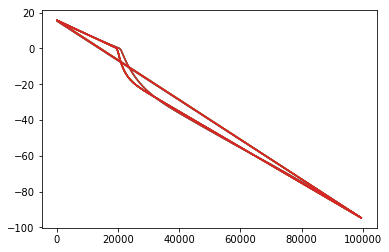

In [27]:
for time_step in range(1000):
    sd.run_one_step(100)
    z3 = sd.grid.at_node['topographic__elevation']
plt.plot(grid.x_of_node,z1,grid.x_of_node,z, grid.x_of_node,z2, grid.x_of_node,z3)

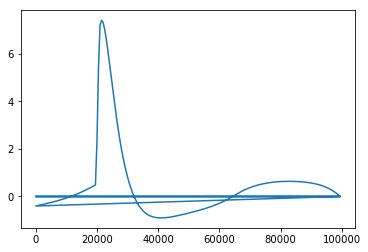

In [28]:
plt.plot(grid.x_of_node,z1-z)

In [29]:
z3

array([  1.58000000e+01,   1.54000000e+01,   1.50000000e+01,
         1.46000000e+01,   1.42000000e+01,   1.38000000e+01,
         1.34000000e+01,   1.30000000e+01,   1.26000000e+01,
         1.22000000e+01,   1.18000000e+01,   1.14000000e+01,
         1.10000000e+01,   1.06000000e+01,   1.02000000e+01,
         9.80000000e+00,   9.40000000e+00,   9.00000000e+00,
         8.60000000e+00,   8.20000000e+00,   7.80000000e+00,
         7.40000000e+00,   7.00000000e+00,   6.60000000e+00,
         6.20000000e+00,   5.80000000e+00,   5.40000000e+00,
         5.00000000e+00,   4.60000000e+00,   4.20000000e+00,
         3.80000000e+00,   3.40000000e+00,   3.00000000e+00,
         2.60000000e+00,   2.20000000e+00,   1.80000000e+00,
         1.40000000e+00,   1.00000000e+00,   6.00000000e-01,
         2.00000000e-01,  -2.01254646e+00,  -5.44066082e+00,
        -8.22107857e+00,  -1.04970697e+01,  -1.23802130e+01,
        -1.39574061e+01,  -1.52963249e+01,  -1.64496755e+01,
        -1.74585055e+01,

In [33]:
shore = find_shoreline2(grid.x_of_node[grid.core_nodes], z3[grid.core_nodes], 0.)
shore

20698.703211121297
20698.703211121297


20698.703211121297

In [35]:
shore1 = find_shoreline2(grid.x_of_node[grid.core_nodes], z2[grid.core_nodes], 0.)
shore1

20698.703211121297
20698.703211121297


20698.703211121297

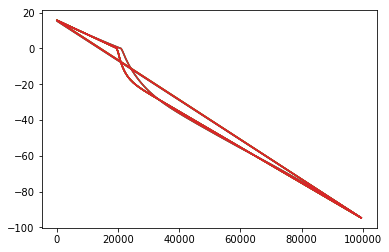

In [32]:
for time_step in range(1000):
    sd.run_one_step(100)
    z4 = sd.grid.at_node['topographic__elevation']
plt.plot(grid.x_of_node,z1,grid.x_of_node,z, grid.x_of_node,z2, grid.x_of_node,z4)

In [36]:
k

array([ 375.        ,  375.        ,  375.        ,  375.        ,
        375.        ,  375.        ,  375.        ,  375.        ,
        375.        ,  375.        ,  375.        ,  375.        ,
        375.        ,  375.        ,  375.        ,  375.        ,
        375.        ,  375.        ,  375.        ,  375.        ,
        375.        ,  375.        ,  375.        ,  375.        ,
        375.        ,  375.        ,  375.        ,  375.        ,
        375.        ,  375.        ,  375.        ,  375.        ,
        375.        ,  375.        ,  375.        ,  375.        ,
        375.        ,  375.        ,  375.        ,  375.        ,
         40.42965861,   41.60630766,   44.35804106,   47.68354863,
         51.30376959,   55.09805252,   58.99792534,   62.95715194,
         66.94116355,   70.92271752,   74.87986976,   78.79488661,
         82.6535598 ,   86.44470157,   90.15972624,   93.7922802 ,
         97.33790641,  100.79373944,  104.15823109,  107.43090

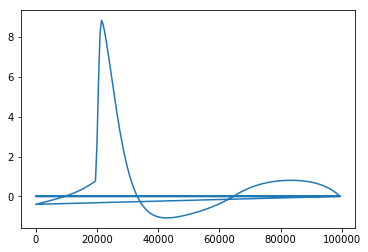

In [37]:
# z1 = sd.grid.at_node['topographic__elevation']
plt.plot(grid.x_of_node,z1-z,)

In [38]:
k1 = sd.grid.at_node['kd']
k1

array([ 375.        ,  375.        ,  375.        ,  375.        ,
        375.        ,  375.        ,  375.        ,  375.        ,
        375.        ,  375.        ,  375.        ,  375.        ,
        375.        ,  375.        ,  375.        ,  375.        ,
        375.        ,  375.        ,  375.        ,  375.        ,
        375.        ,  375.        ,  375.        ,  375.        ,
        375.        ,  375.        ,  375.        ,  375.        ,
        375.        ,  375.        ,  375.        ,  375.        ,
        375.        ,  375.        ,  375.        ,  375.        ,
        375.        ,  375.        ,  375.        ,  375.        ,
        -22.92056827,    0.66650525,   12.54573736,   20.78100141,
         27.44756646,   33.30836222,   38.70082388,   43.79097037,
         48.66566598,   53.37184145,   57.93514249,   62.3695444 ,
         66.68260044,   70.87841407,   74.95935332,   78.92703899,
         82.78290149,   86.52847743,   90.16554931,   93.69619

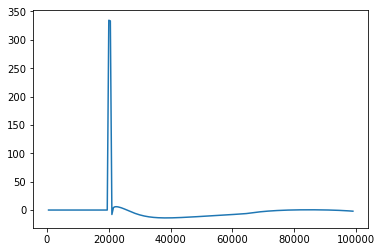

In [39]:
plt.plot(grid.x_of_node[grid.core_nodes],k1[grid.core_nodes]-k[grid.core_nodes],)

In [ ]:
k1-k